# Unsupervised outliers detection (event detection)

In [3]:
import drama as drm
from drama.v1.outlier_finder import grid_run_drama
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
from drama.run_tools import synt_event

%matplotlib inline

## Signal synthesis

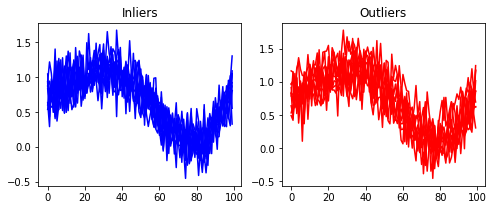

In [4]:
i_sig = 1 # signal number
n_ftrs = 100 
noise = 0.2
scl = 0.01
sft = 0.01

X, y = synt_event(i_sig,n_ftrs,sigma = noise,n1 = scl,n2 = sft,n3 = scl,n4 = sft)

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(8,3)) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax1.set_title('Inliers')
ax2.set_title('Outliers')

inliers = X[y==0]
outliers = X[y==1]
for i in range(10):
    ax1.plot(inliers[i],'b')
    ax2.plot(outliers[i],'r')

# Outlier detection

In [5]:
n_try = 2

result = []
for i in range(n_try):
    auc,mcc,rws,conf = grid_run_drama(X,y)
    arr = np.stack([auc,mcc,rws],axis=-1)
    result.append(arr)
result = np.array(result)

drts = np.unique(conf[:,1])
metrs = np.unique(conf[:,2])

res = result.reshape(n_try,5,10,-1)

W1116 00:42:38.642469 140683446261568 deprecation.py:506] From /home/gf/packages/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Unsupervised outlier detection mode.
Unsupervised outlier detection mode.


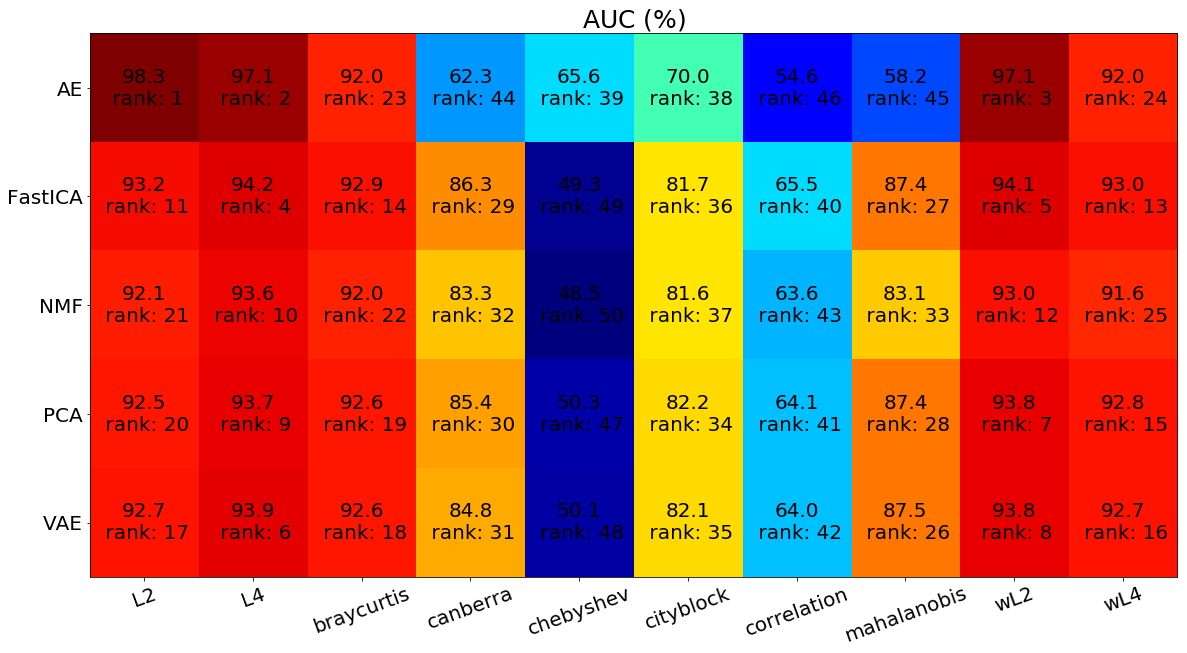

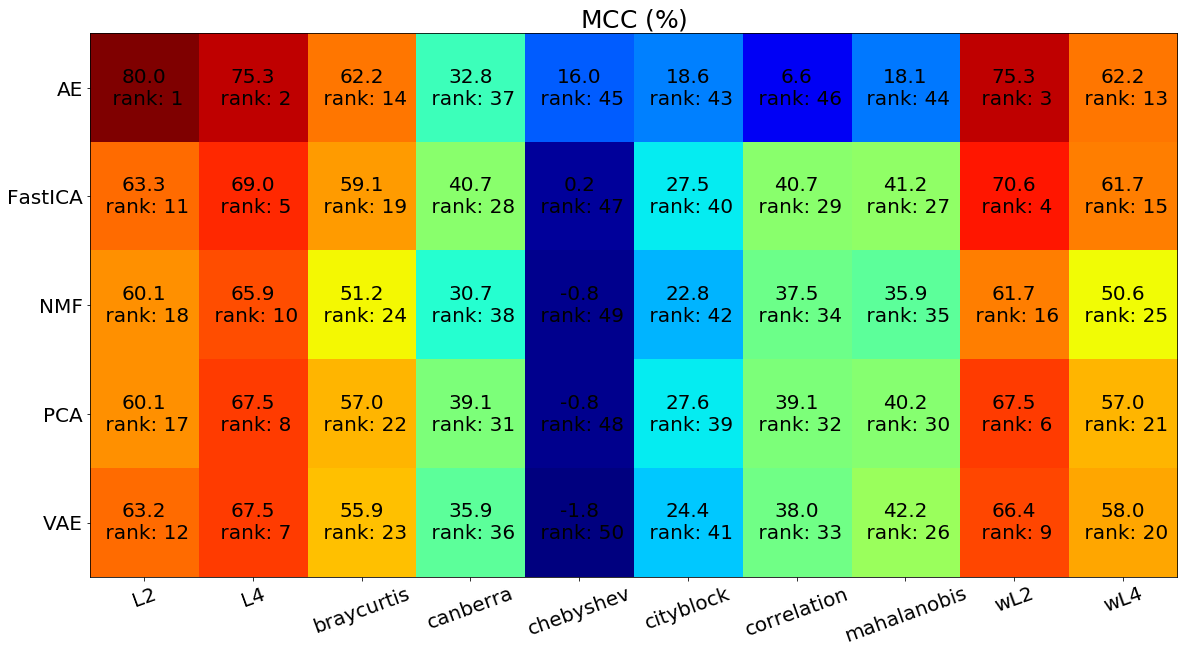

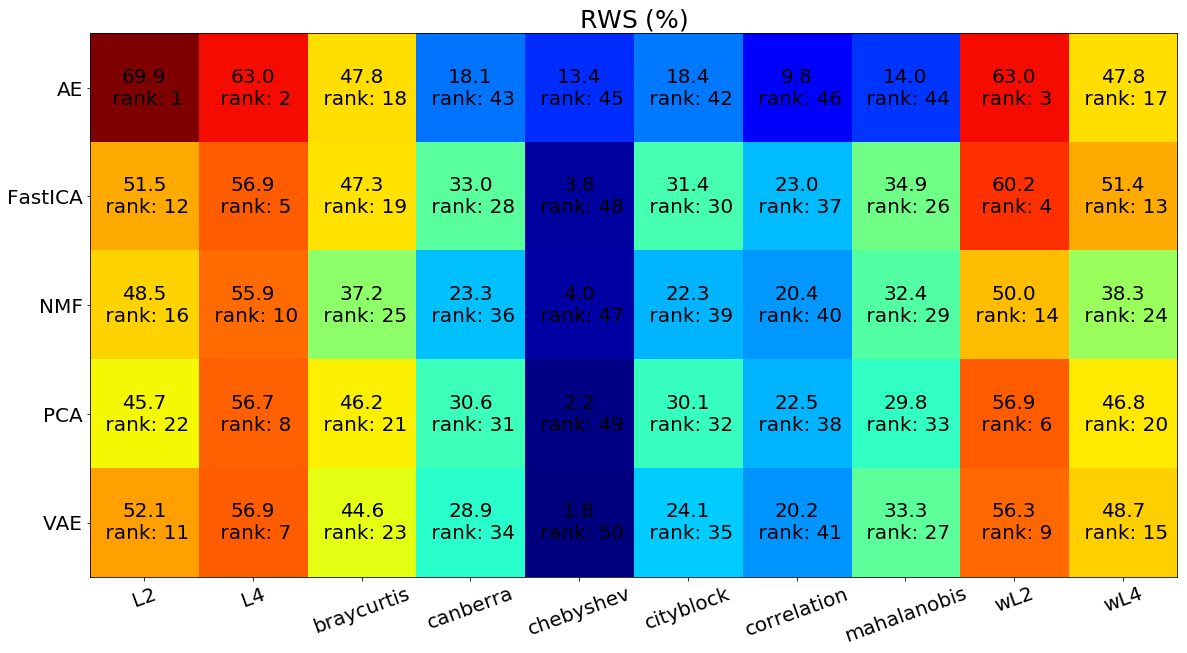

In [6]:
drm.plot_table(np.mean(res,axis=0),drts,metrs)

In [7]:
lof_all = np.zeros((n_try,3))
ifr_all = np.zeros((n_try,3))
df = drm.sk_check(X,X,y,[1])
for i in range(n_try):
    for j,scr in enumerate(['AUC','MCC','RWS']):
        lof_all[i,j] = df[scr][0]
        ifr_all[i,j] = df[scr][1]

/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Text(0, -30, '** Colors depend on AUC.')

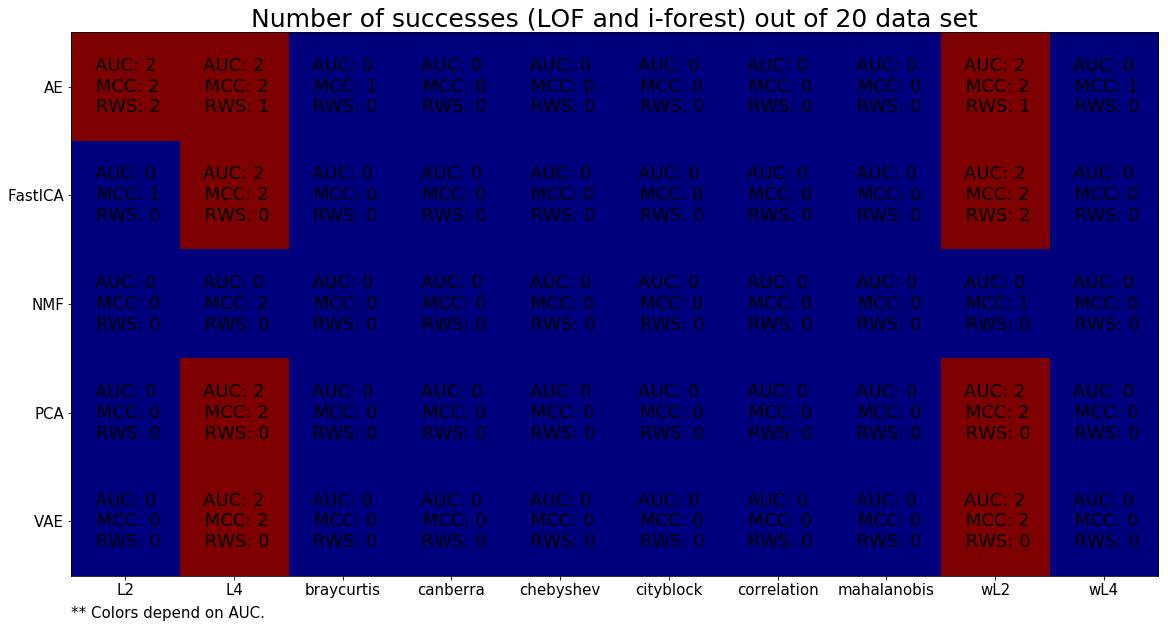

In [8]:
auc = np.sum((res[:, :, :, 0].T>lof_all[:, 0]) & (res[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
mcc = np.sum((res[:, :, :, 1].T>lof_all[:, 1]) & (res[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
rws = np.sum((res[:, :, :, 2].T>lof_all[:, 2]) & (res[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

fig = plt.figure(figsize=(20,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

width, height = auc.shape

for x in range(width):
    for y in range(height):
        ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=18);

plt.xticks(range(10),metrs,fontsize=15)
plt.yticks(range(5), drts,fontsize=15)

plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
             textcoords='offset points', va='top',fontsize=15)

# plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')

In [16]:
a = 'salam'

In [18]:
type(a) is str

True